## Travel sales man problem using simulated annealing 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import random
import pandas as pd
import time

In [5]:
start_time = time.time()

df = pd.read_csv('Qartar194.csv')

df_list = df.index.values.tolist()
x = df_list[:]
random.shuffle(x)
T0 = 10000 # initial Temperature 
temp_for_plot = T0 # for plot purpose 
M=10000 # the number of times to decrease the temperature 
N = 20 # for each m, the number of times of neighborhood searches
alpha =0.85 # how much temperature to decrease 

# to plot distance for each temperature  
temp = []
dist = []


for i in range(M): # the number of times to decrease the temperature 
    
    for j in range(N): # for each m, the number of times of neighborhood searches
        
            
        x_temp= df_list[:]
        random.shuffle(x_temp)
        
        df_current = df.reindex(index=x)  
        df_possible  = df.reindex(index=x_temp)

        # euclidean distance
        possible_dist = sum(((((df_possible["a"]-df_possible["a"].shift(-1))**2)+
                              (df_possible['b']- df_possible['b'].shift(-1))**2)**.5)[0:-1])
        
        current_dist = sum(((((df_current["a"]-df_current["a"].shift(-1))**2)+
                             (df_current['b']- df_current['b'].shift(-1))**2)**.5)[0:-1])
        
        rand_num = np.random.rand()
        
        ## if new solution is better than current solution, then take new solution,
        ## if it is worse than current solution, use formula to decied what to take
        
        formula = 1/(np.exp((possible_dist - current_dist)/T0))
        
        # if new possible solution is smaller than current(better as it is minimalization prob)
        if possible_dist <= current_dist:
            
            x = x_temp
            
        # even though new solution is worse, take the worse solution if the condition is met
        elif rand_num <= formula:
            
            x = x_temp
            
        # else, stay at current solution 
        else:
            
            x = x
            
    temp.append(T0) 
    dist.append(current_dist)
    
    T0= alpha*T0

print("minimum distance is: %0.3f" % current_dist)
print("Computational time: {:.2f} seconds".format(time.time()-start_time))



<ipython-input-5-8c7984dd1b21>:42: RuntimeWarning: overflow encountered in exp
  formula = 1/(np.exp((possible_dist - current_dist)/T0))
<ipython-input-5-8c7984dd1b21>:42: RuntimeWarning: divide by zero encountered in double_scalars
  formula = 1/(np.exp((possible_dist - current_dist)/T0))


minimum distance is: 78866.588
Computational time: 421.13 seconds


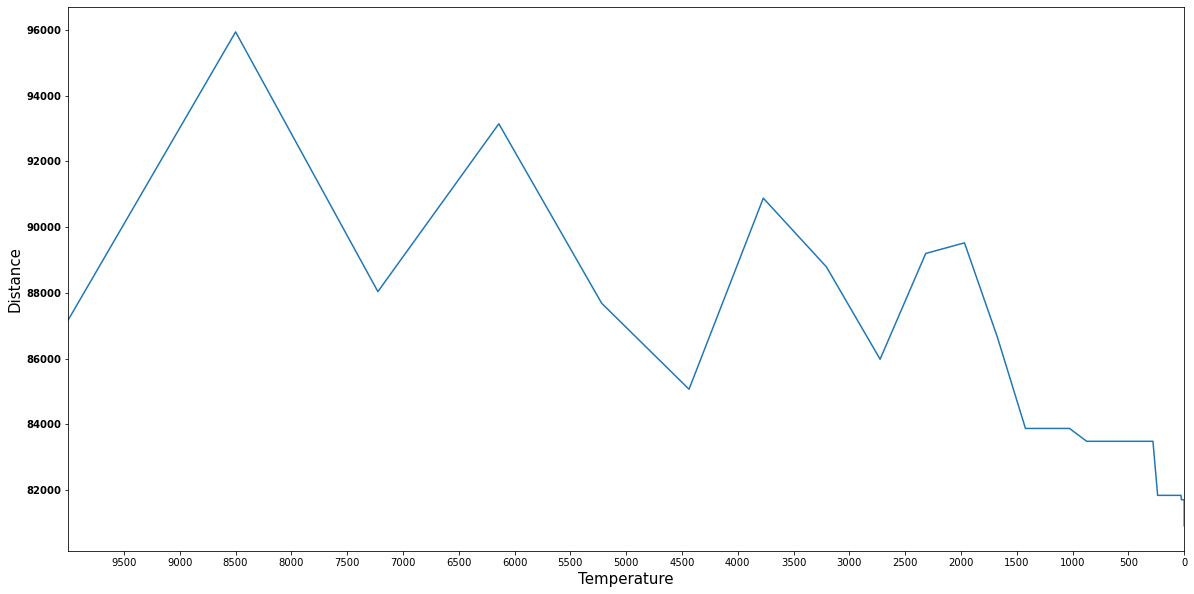

In [4]:
plt.figure(figsize=(20, 10))
plt.plot(temp, dist)
plt.xlabel("Temperature", fontsize =15)
plt.ylabel("Distance", fontsize =15)
plt.xlim(temp_for_plot,0)
plt.xticks(np.arange(min(temp),max(temp),500))
plt.yticks(fontweight = 'bold')

plt.show()